In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', delimiter = ";")
df.sample(5, random_state=133)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8710,36,technician,single,secondary,no,7503,yes,no,unknown,4,jun,25,1,-1,0,unknown,no
587,37,services,married,secondary,no,358,yes,no,unknown,6,may,390,3,-1,0,unknown,no
3650,28,blue-collar,single,primary,no,643,yes,no,unknown,15,may,297,1,-1,0,unknown,no
16743,30,management,married,tertiary,no,14,no,no,cellular,24,jul,90,2,-1,0,unknown,no
11297,51,blue-collar,married,primary,no,1238,no,no,unknown,18,jun,48,10,-1,0,unknown,no


### DESCRIPTIVE STATISTICS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Pengelompokan kolom berdasarkan jenis
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Melakukan compare antara mean dan median. Apakah nilai mean dan median jaraknya jauh? Jika jauh maka ada indikasi skew distribution

In [8]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
for col in cats :
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

### UNIVARIATE STATISTICS

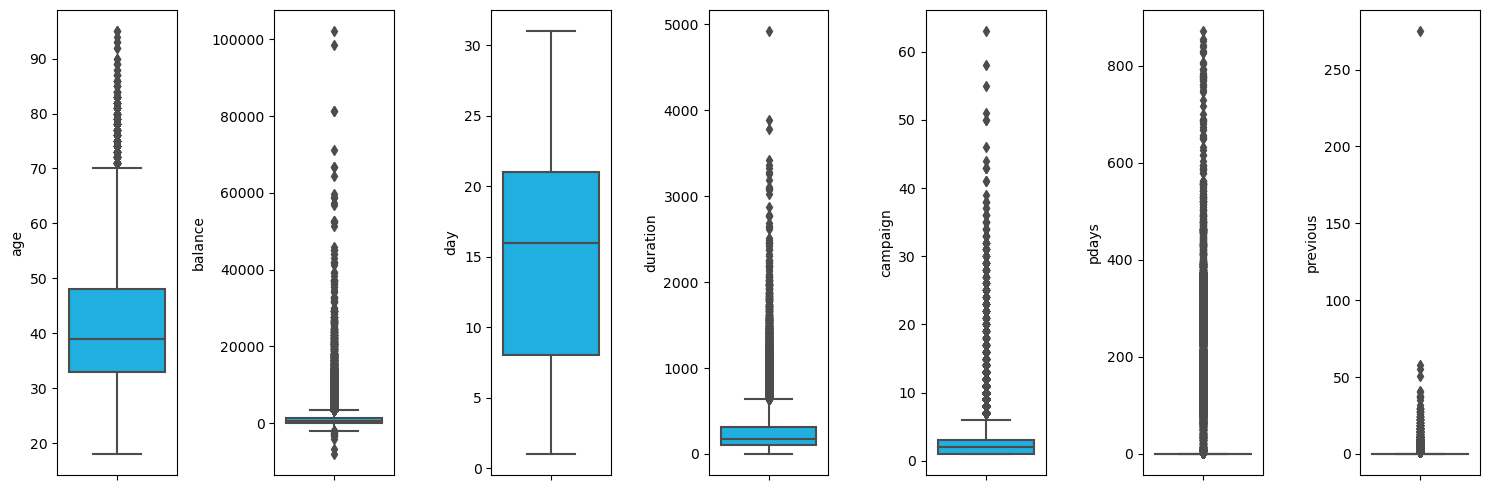

In [11]:
plt.figure(figsize=(15,5))
for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot (y=df[nums [i]], color= 'deepskyblue',orient='v')
    plt.tight_layout()

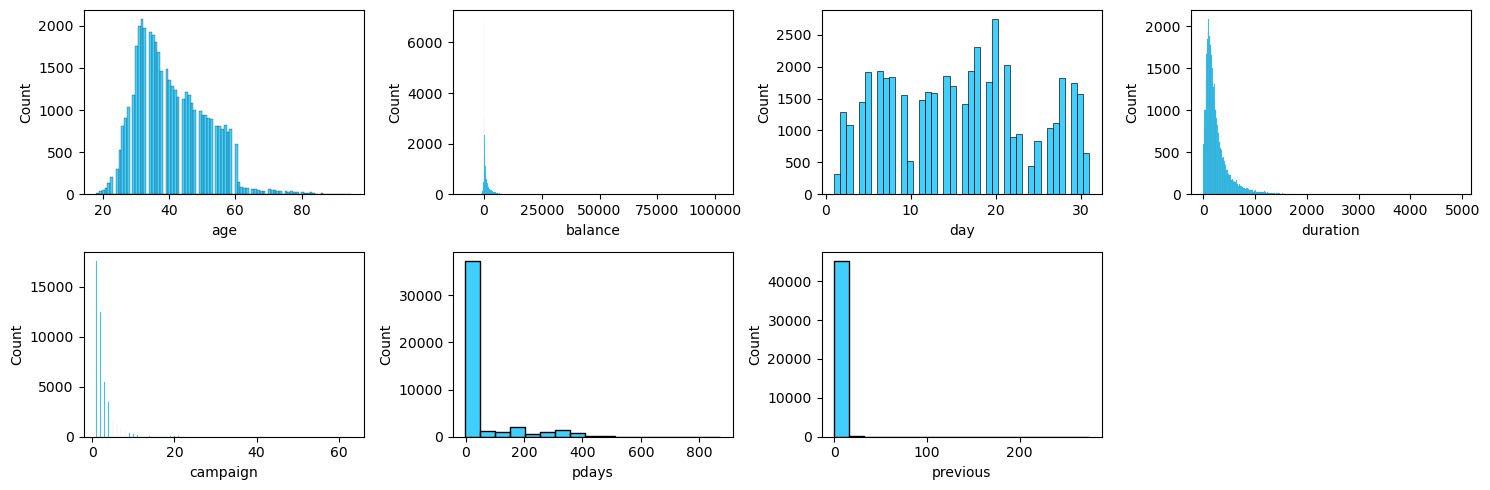

In [12]:
plt.figure(figsize=(15,5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=df[nums[i]], color='deepskyblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

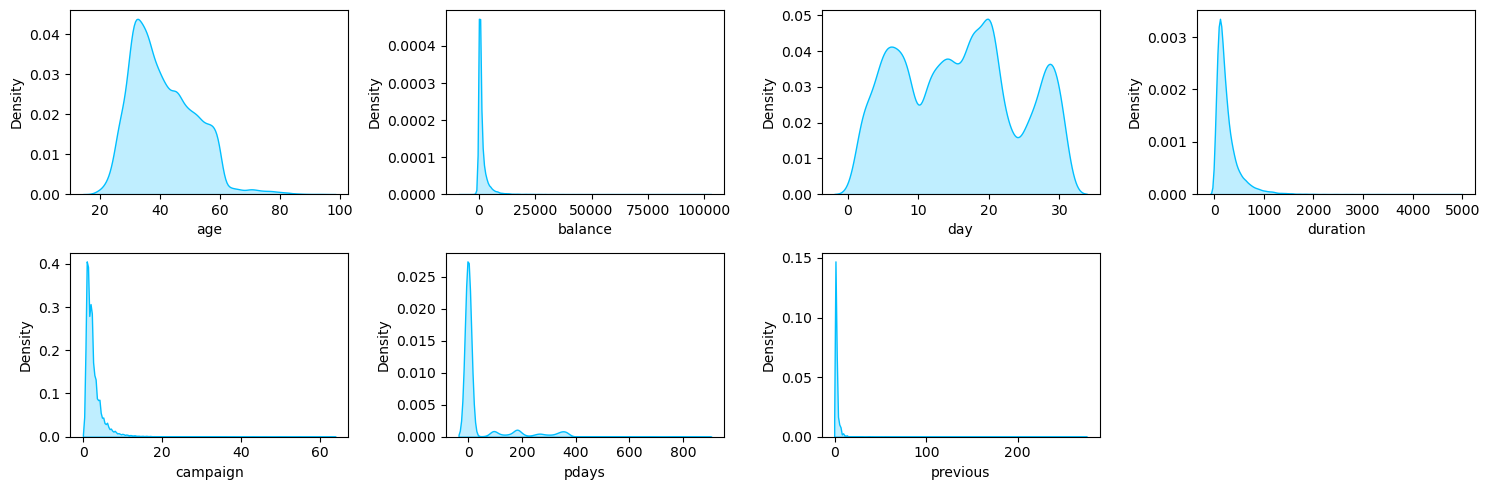

In [13]:
plt.figure(figsize=(15,5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[nums[i]], color='deepskyblue', fill=True)
    plt.xlabel(nums[i])
    plt.tight_layout()

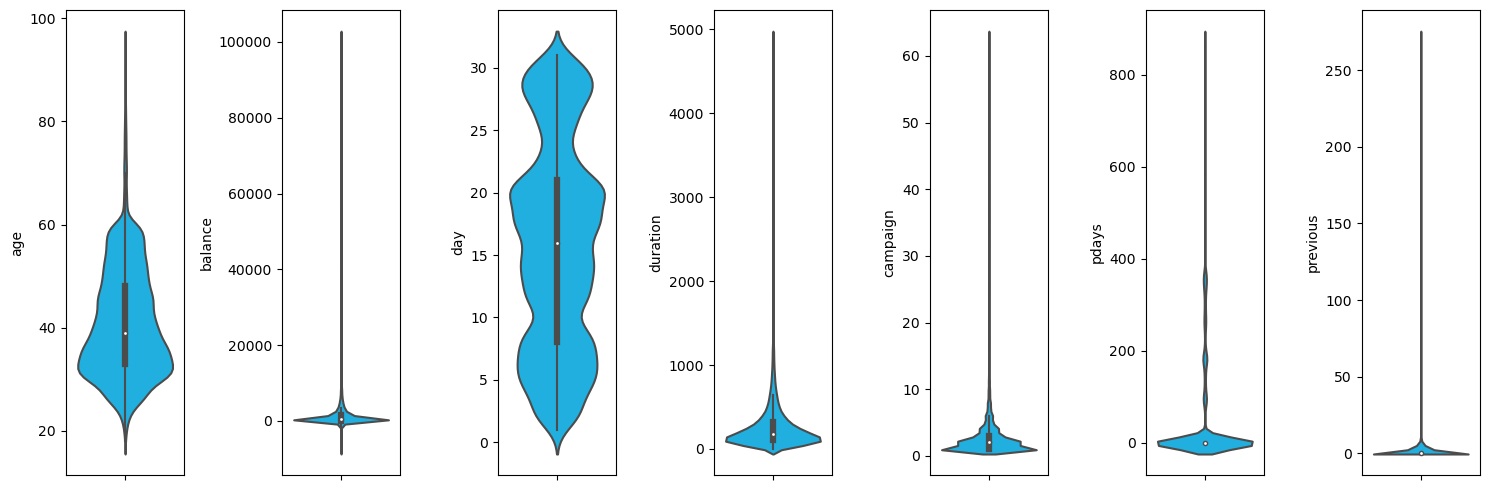

In [14]:
plt.figure(figsize=(15,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

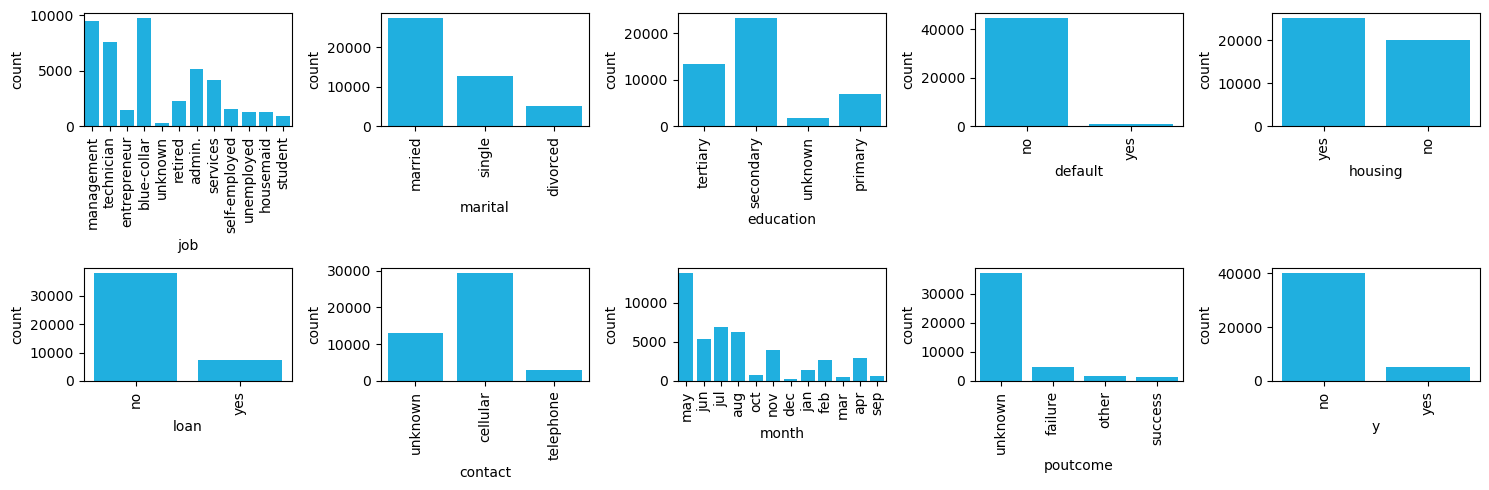

In [15]:
features = cats
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt. subplot(2, 5, i+1)
    sns.countplot (x=df[features [i]], color='deepskyblue')
    plt.tight_layout()
    plt.xticks(rotation = 90)

### MULTIVARIATE ANALYSIS

In [16]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_18536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_18536\2786289141.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True,  fmt='.2f')


<Axes: >

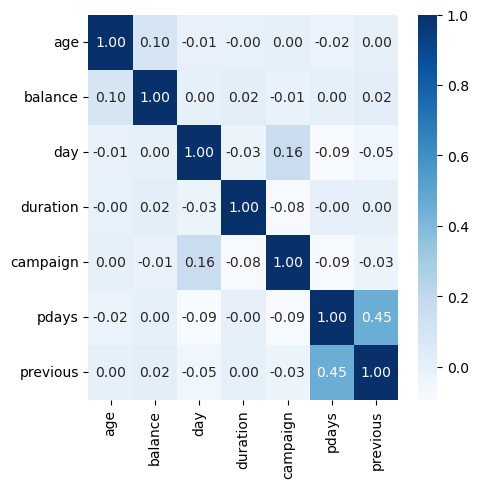

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True,  fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

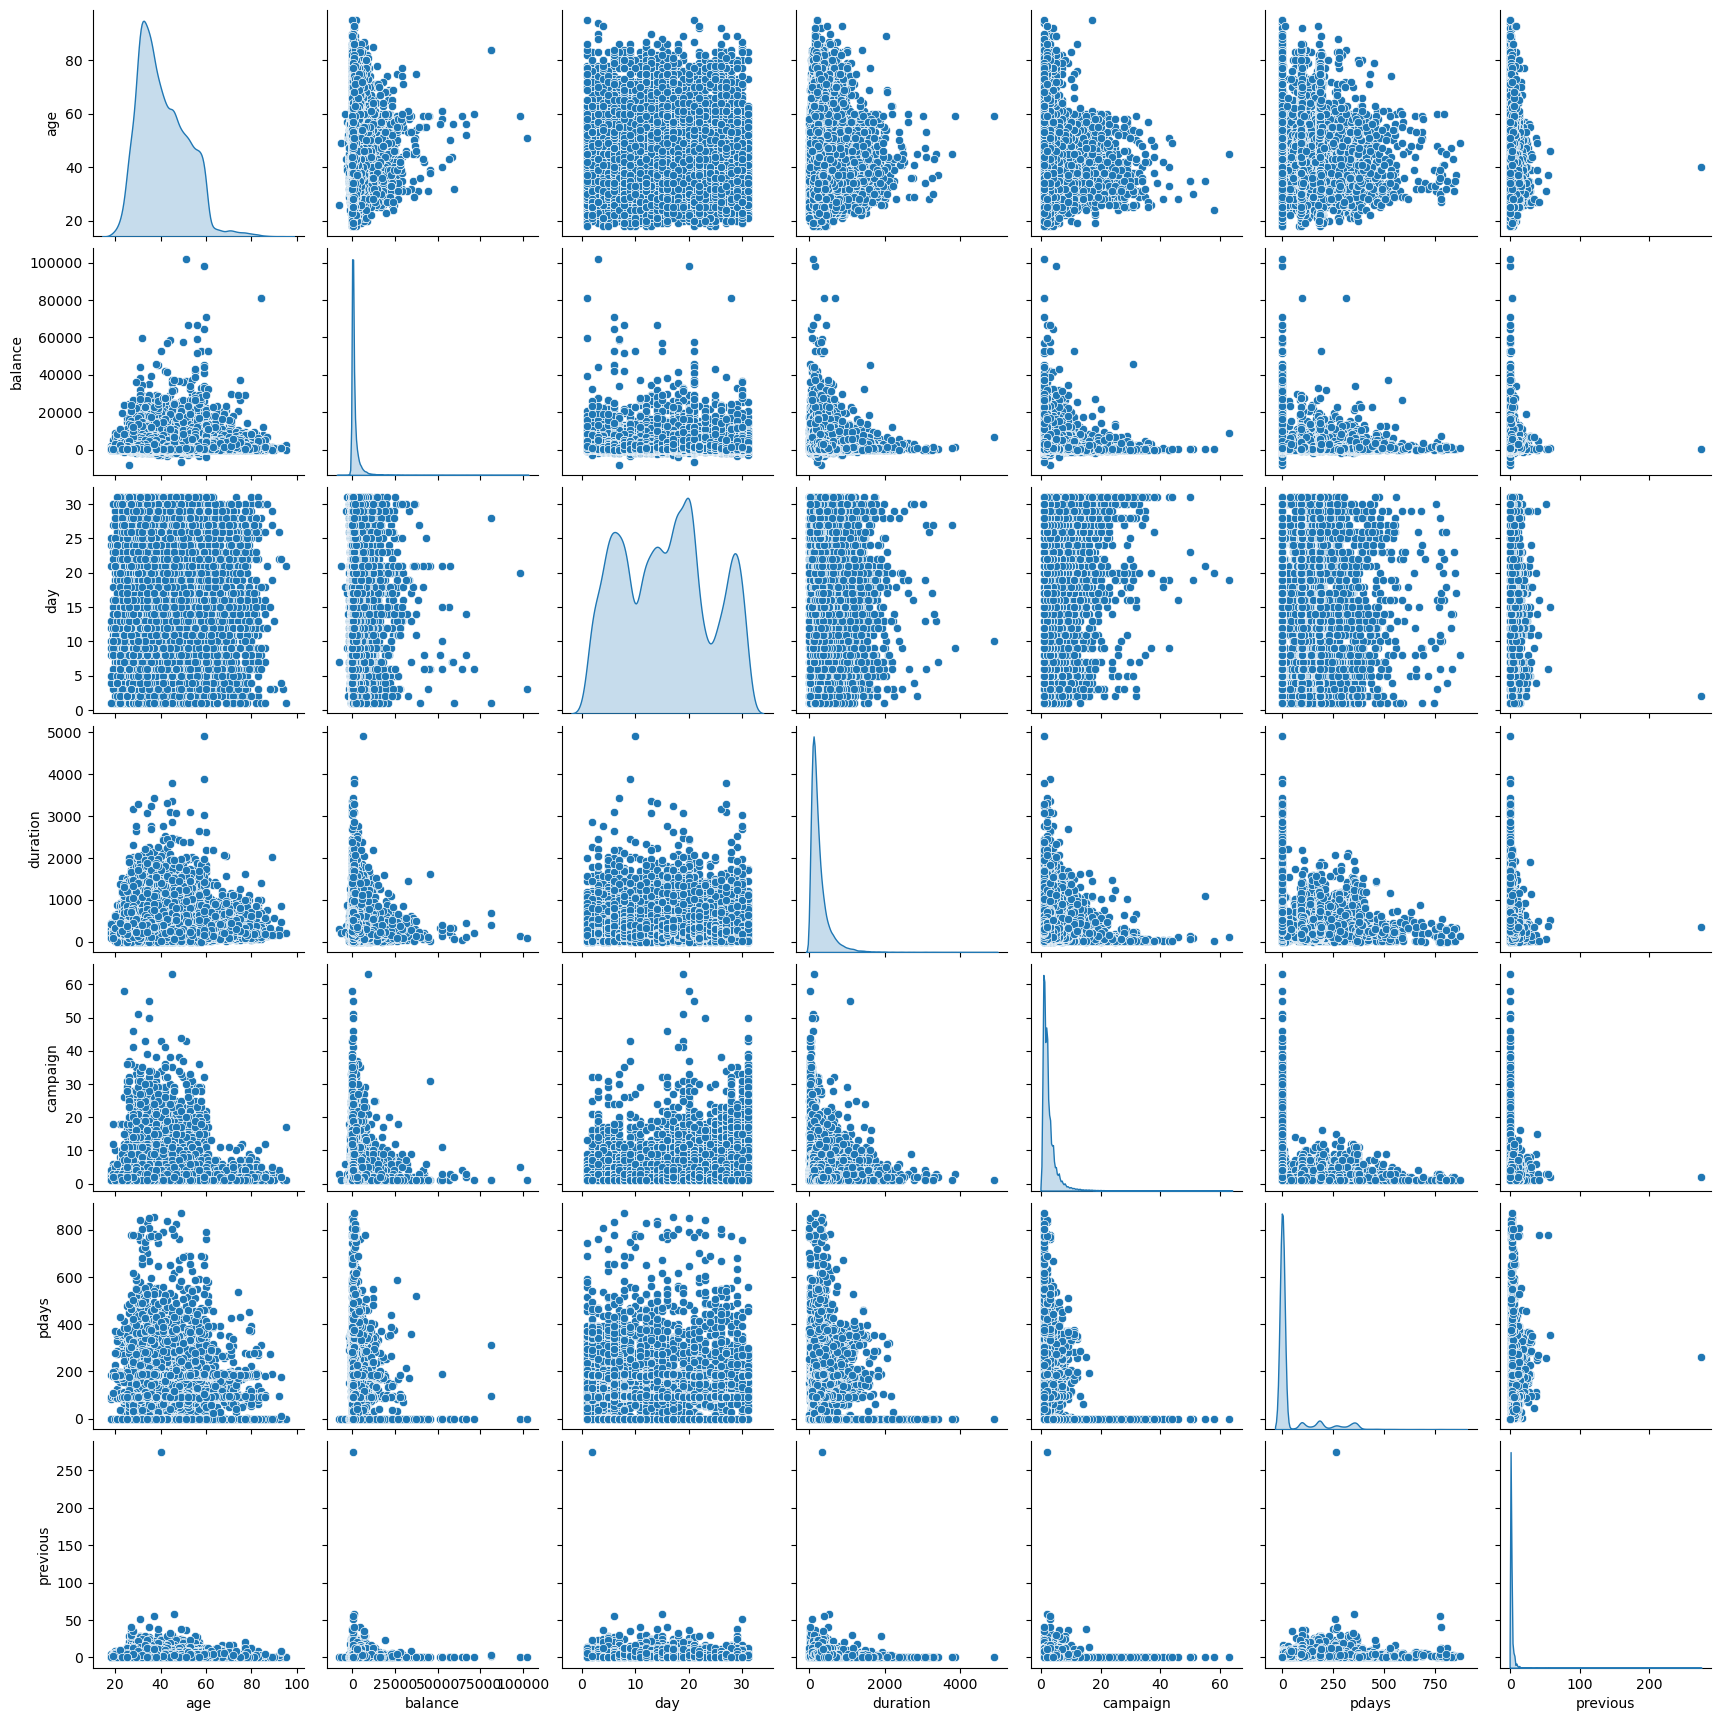

In [18]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde')

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', hue='y')

Error in callback <function _draw_all_if_interactive at 0x0000020EB6B1E050> (for post_execute):


KeyboardInterrupt: 

<Figure size 1500x1500 with 0 Axes>

# Categorical vs Numerical Plot

In [ ]:
nums

In [ ]:
cats

In [ ]:
def grafik(cat, a=25, b=30):
  fig = plt.figure(figsize= (a, b))
  for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 2, i+1)
    sns.stripplot(data=df, ax=ax, x=cat, y=nums[i], hue=cat, legend=False)
    plt.tight_layout()

In [ ]:
grafik('job')

In [ ]:
grafik('marital', 15, 30)

In [ ]:
grafik('education', 15, 30)

In [ ]:
grafik('default', 10)

In [ ]:
grafik('housing', 10)

In [ ]:
grafik('loan', 10)

In [ ]:
grafik('contact', 10)

In [ ]:
grafik('month')

In [ ]:
grafik('poutcome', 10)

In [ ]:
grafik('y', 10)

### Relationship to Target Variable

##### Job

In [35]:
pivot_job = pd.pivot_table(df, 
                           index = ['job'],
                           columns=['y'],
                           aggfunc = {"job" : "count"}
                          ).reset_index()

pivot_job.columns = ["Job", "Do not deposit", "Deposit"]

In [38]:
pivot_job["Deposit"].sum()+pivot_job["Do not deposit"].sum()

45211

In [39]:
pivot_job["Percent who deposit"] = (pivot_job["Deposit"]/(pivot_job["Deposit"]+pivot_job["Do not deposit"])*100)

In [43]:
pivot_job.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Job,Do not deposit,Deposit,Percent who deposit
0,8,student,669,269,28.678038
1,5,retired,1748,516,22.791519
2,10,unemployed,1101,202,15.502686
3,4,management,8157,1301,13.755551
4,0,admin.,4540,631,12.202669
5,6,self-employed,1392,187,11.842939
6,11,unknown,254,34,11.805556
7,9,technician,6757,840,11.056996
8,7,services,3785,369,8.883004
9,3,housemaid,1131,109,8.790323


In [44]:
pivot_job.sort_values(by=['Deposit'], ascending=False).reset_index()

,index,Job,Do not deposit,Deposit,Percent who deposit
0,4,management,8157,1301,13.755551
1,9,technician,6757,840,11.056996
2,1,blue-collar,9024,708,7.274969
3,0,admin.,4540,631,12.202669
4,5,retired,1748,516,22.791519
5,7,services,3785,369,8.883004
6,8,student,669,269,28.678038
7,10,unemployed,1101,202,15.502686
8,6,self-employed,1392,187,11.842939
9,2,entrepreneur,1364,123,8.271688


<Axes: xlabel='job', ylabel='count'>

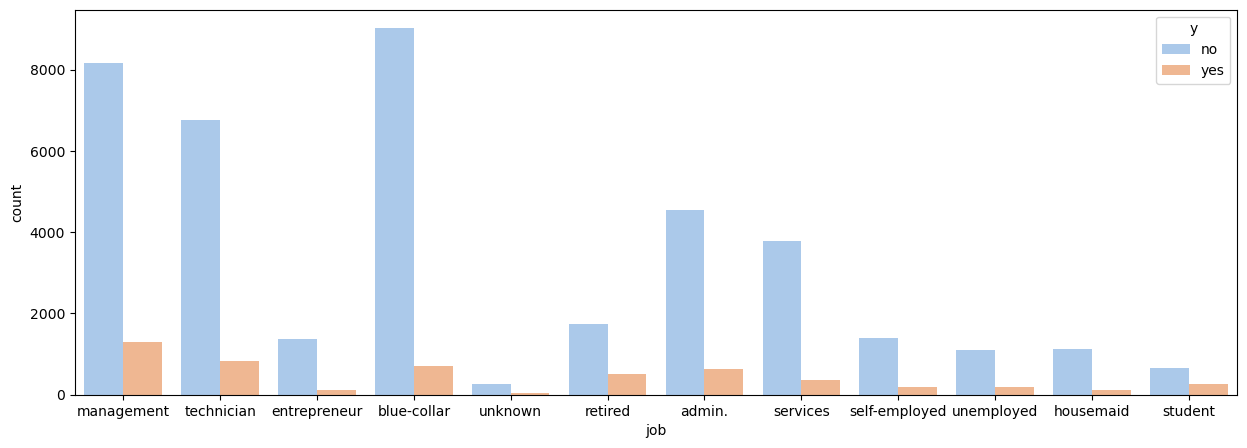

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='job', hue='y', palette="pastel")

<Axes: xlabel='marital', ylabel='count'>

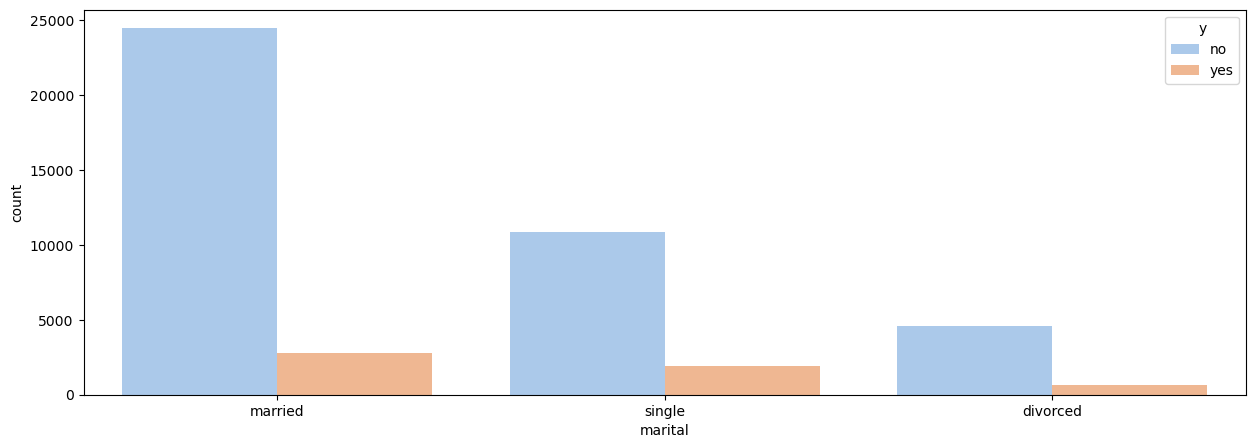

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='marital', hue='y', palette="pastel")

<Axes: xlabel='education', ylabel='count'>

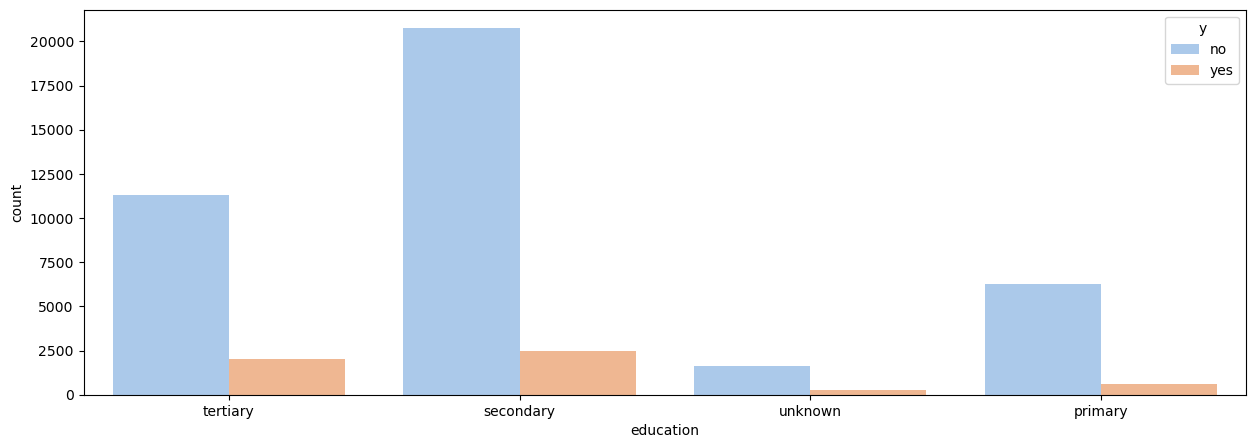

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education', hue='y', palette="pastel")

<Axes: xlabel='housing', ylabel='count'>

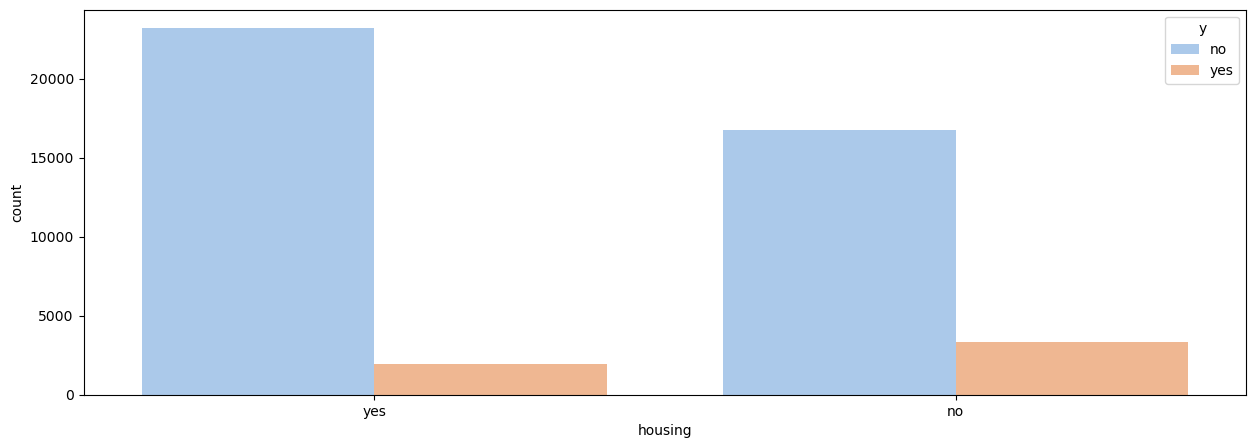

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='housing', hue='y', palette="pastel")

In [68]:
pivot_marital = pd.pivot_table(df, 
                           index = ['marital'],
                           columns=['y'],
                           aggfunc = {"marital" : "count"}
                          ).reset_index()

pivot_marital.columns = ["Married?", "Do not deposit", "Deposit"]
pivot_marital["Percent who deposit"] = (pivot_marital["Deposit"]/(pivot_marital["Deposit"]+pivot_marital["Do not deposit"])*100)

pivot_marital["Deposit"].sum()+pivot_marital["Do not deposit"].sum()

45211

In [66]:
pivot_marital.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Married?,Do not deposit,Deposit,Percent who deposit
0,2,single,10878,1912,14.949179
1,0,divorced,4585,622,11.945458
2,1,married,24459,2755,10.123466


In [69]:
pivot_education = pd.pivot_table(df, 
                           index = ['education'],
                           columns=['y'],
                           aggfunc = {"education" : "count"}
                          ).reset_index()

pivot_education.columns = ["Education", "Do not deposit", "Deposit"]
pivot_education["Percent who deposit"] = (pivot_education["Deposit"]/(pivot_education["Deposit"]+pivot_education["Do not deposit"])*100)

pivot_education["Deposit"].sum()+pivot_education["Do not deposit"].sum()

45211

In [70]:
pivot_education.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Education,Do not deposit,Deposit,Percent who deposit
0,2,tertiary,11305,1996,15.006390
1,3,unknown,1605,252,13.570275
2,1,secondary,20752,2450,10.559435
3,0,primary,6260,591,8.626478


In [71]:
pivot_housing = pd.pivot_table(df, 
                           index = ['housing'],
                           columns=['y'],
                           aggfunc = {"housing" : "count"}
                          ).reset_index()

pivot_housing.columns = ["Housing Loan", "Do not deposit", "Deposit"]
pivot_housing["Percent who deposit"] = (pivot_housing["Deposit"]/(pivot_housing["Deposit"]+pivot_housing["Do not deposit"])*100)

pivot_housing["Deposit"].sum()+pivot_housing["Do not deposit"].sum()

45211

In [72]:
pivot_housing.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Housing Loan,Do not deposit,Deposit,Percent who deposit
0,0,no,16727,3354,16.702355
1,1,yes,23195,1935,7.699960


In [73]:
pivot_loan = pd.pivot_table(df, 
                           index = ['loan'],
                           columns=['y'],
                           aggfunc = {"loan" : "count"}
                          ).reset_index()

pivot_loan.columns = ["Loan", "Do not deposit", "Deposit"]
pivot_loan["Percent who deposit"] = (pivot_loan["Deposit"]/(pivot_loan["Deposit"]+pivot_loan["Do not deposit"])*100)

pivot_loan["Deposit"].sum()+pivot_loan["Do not deposit"].sum()

45211

In [74]:
pivot_loan.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Loan,Do not deposit,Deposit,Percent who deposit
0,0,no,33162,4805,12.655727
1,1,yes,6760,484,6.681391


<Axes: xlabel='loan', ylabel='count'>

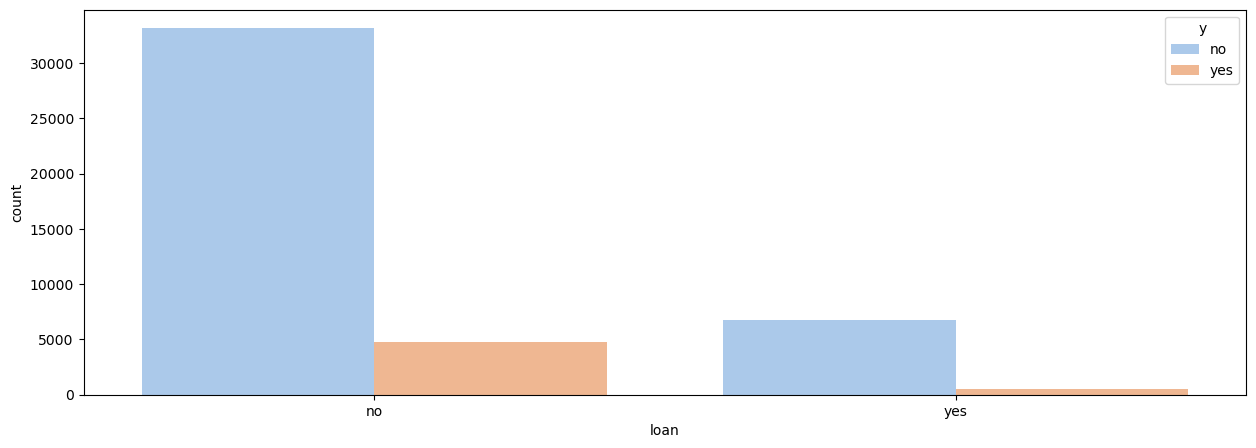

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='loan', hue='y', palette="pastel")